# **8. 고급 인공신경망의 구현**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **8.5 텐서플로우의 MNIST 예제로 시작하는 신경망의 Hello World!**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train 데이터의 형태:', x_train.shape)
print('x_train[0] 데이터의 형태:', x_train[0].shape)
print('y_train 데이터의 형태:',y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train 데이터의 형태: (60000, 28, 28)
x_train[0] 데이터의 형태: (28, 28)
y_train 데이터의 형태: (60000,)


In [2]:
num = x_train[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

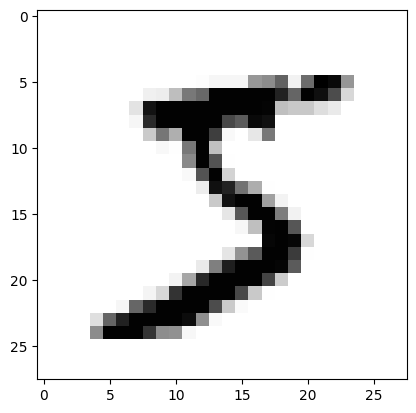

In [3]:
plt.imshow(num, cmap='Greys', interpolation='nearest')

In [4]:
print('y_train[0] =', y_train[0])

y_train[0] = 5


### **8.6 케라스로 순차 심층 신경망 구축하기**

In [5]:
x_train, x_test = x_train / 255, x_test / 255 # 입력값 정규화

model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

# 학습을 위한 최적화 함수, 손실 함수등을 가진 모델을 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8923 - loss: 0.3774
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9710 - loss: 0.0983
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9816 - loss: 0.0608
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0424
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9911 - loss: 0.0289


### **8.7 인공 신경망을 최적화하는 방법**

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

In [7]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과 :
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0860
test 데이터의 손실값 0.06977199763059616 test 데이터의 정확도 0.9800000190734863


### **8.8 부드러운 최대값: 소프트맥스 함수**

In [8]:
import numpy as np

def softmax(a):
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp     # 각각의 확률값을 구함
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [9]:
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))

소프트맥스 함수의 최대값 : 0.7772704668966948


In [10]:
# 소프트맥스 함수의 입력값을 두 배로 증가시켜보자
a = np.array([0.5, 4.1, 2.5, 5.6, 1.2]) * 2
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))

신경망의 예측값 : [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력 : [3.53328547e-05 4.73259126e-02 1.92910850e-03 9.50566364e-01
 1.43281791e-04]
소프트맥스 함수의 최대값 : 0.9505663642857384


### **8.9 원-핫 인코딩과 평균제곱 오차**


In [11]:
from keras.utils import to_categorical

data = np.array([0, 1, 2, 3, 4])  # 수치 데이터 0에서 4까지의 값
print('인코딩할 원본 데이터',data)
encoded = to_categorical(data)    # 원-핫 인코딩된 범주형 데이터 생성
print('원-핫 인코딩된 데이터 :')
print(encoded)

인코딩할 원본 데이터 [0 1 2 3 4]
원-핫 인코딩된 데이터 :
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [12]:
import numpy as np

# 정답 3이 인코딩된 target과 신경망의 예측값 y_hat이 있다고 가정하자
target = np.array([0, 0, 0, 1, 0])
y_hat = np.array([0.005, 0.173, 0.035, 0.777, 0.01])

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()

print('y_hat과 target과의 오차 :', mse(y_hat, target))

y_hat과 target과의 오차 : 0.016201599999999997


In [13]:
# 정답에서 많이 벗어난 other_y_hat 추정치
other_y_hat = np.array([0.2, 0.3, 0.4, 0.01, 0.09])
# other_y_hat 추정치와 정답과의 오차를 알아보자
print('other_y_hat과 target과의 오차 :', mse( other_y_hat, target ))

other_y_hat과 target과의 오차 : 0.25564


### **8.10 교차 엔트로피 오차의 도입**

In [14]:
# 교차 엔트로피 오차 함수를 에러 함수로 사용해 보도록 하자
def cee(y, t):
   delta = 1e-7    # 분모가 0이 되지 않도록 작은 마진 값을 준다
   return -np.sum(t * np.log(y + delta))

t = np.array([0, 0, 1])
y_hat1 = np.array([0.4, 0.05, 0.55])
y_hat2 = np.array([0.9, 0.09, 0.01])

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 cee : {:.2f}'.format(cee(y_hat1, t)))
print('y_hat2과의 cee : {:.2f}'.format(cee(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(cee(y_hat2, t)/cee(y_hat1, t)))

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 mse : {:.2f}'.format(mse(y_hat1, t)))
print('y_hat2과의 mse : {:.2f}'.format(mse(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(mse(y_hat2, t)/mse(y_hat1, t)))

y_hat1과의 cee : 0.60
y_hat2과의 cee : 4.61
두 값의 비 : 7.70
y_hat1과의 mse : 0.12
y_hat2과의 mse : 0.60
두 값의 비 : 4.93


### **8.11 정규화와 표준화**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

yr = np.array([15, 30, 23, 5, 9, 43, 33, 29, 3, 56])
n_rooms = np.array([2, 4, 3, 4, 4, 3, 3, 1, 1, 2])

min_max_scaler = MinMaxScaler()
yr_norm = min_max_scaler.fit_transform(yr[:, np.newaxis])
n_rooms_norm = min_max_scaler.fit_transform(n_rooms[:, np.newaxis])

plt.scatter(yr_norm, n_rooms_norm, c='red')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('year')
plt.ylabel('num of rooms')